<a href="https://colab.research.google.com/github/abhimanyukumar003/abhimanyukumar003.github.io/blob/main/b22ee003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 problems 1


(a) Here's a Python function computeCentroid that computes the centroid of a set of 3-dimensional features:


In [1]:
import numpy as np

def computeCentroid(features):
    return np.mean(features, axis=0)


b) Now, let's implement the mykmeans function from scratch


In [ ]:
def mykmeans(X, k, max_iters=100):
    # Randomly initial centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Assign each pixel to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

        # Update centroids
        new_centroids = np.array([computeCentroid(X[labels == i]) for i in range(k)])

        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids


c) Using the centroids obtained from mykmeans, we can represent each pixel in the image with its nearest centroid's color.


d) We can use the implementation of K-means provided by scikit-learn (sklearn.cluster.KMeans) to compress the image and compare the results with our custom implementation.



In [ ]:
from sklearn.cluster import KMeans

def compress_image_sklearn(image, k):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)

    # Fit KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)

    # Replace pixel values with centroid values
    compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]

    # Reshape back to original image dimensions
    compressed_image = compressed_pixels.reshape(image.shape)

    return compressed_image


To implement spatial coherence, we can modify the K-means algorithm to consider spatial information during clustering. One way to achieve this is by incorporating spatial proximity into the distance metric used for clustering. We can define a new distance metric that considers both color similarity and spatial proximity.
 implement this:

In [ ]:
def spatial_kmeans(X, k, spatial_weight=0.5, max_iters=100):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Compute distances considering both color and spatial proximity
        color_distances = np.linalg.norm(X[:, np.newaxis, :3] - centroids, axis=2)
        spatial_distances = np.linalg.norm(X[:, np.newaxis, 3:] - centroids[:, 3:], axis=2)
        distances = color_distances + spatial_weight * spatial_distances

        # Assign each pixel to the nearest centroid
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([computeCentroid(X[labels == i]) for i in range(k)])

        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids


   problem 2
   

Task 1(a): Loading and Preprocessing the Iris Dataset

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)

# Select only petal length and petal width features
X = iris.data[['petal length (cm)', 'petal width (cm)']]
y = iris.target

# Filter out only 'setosa' and 'versicolor' classes for binary classification
X_binary = X[y != 2]
y_binary = y[y != 2]

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_binary)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_binary, test_size=0.2, random_state=42)


Now,  Task 1(b) where we'll train a Linear Support Vector Classifier (LinearSVC) and visualize its decision boundary.

Task 1(b): Training Linear Support Vector Classifier and Visualizing Decision Boundary

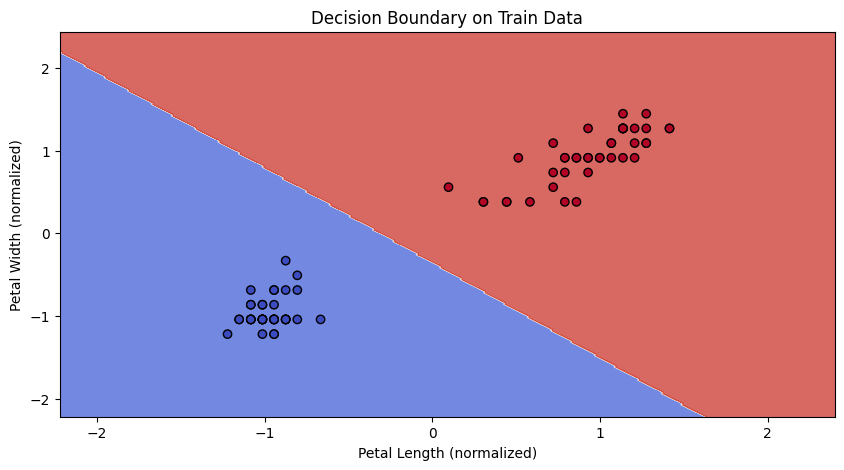

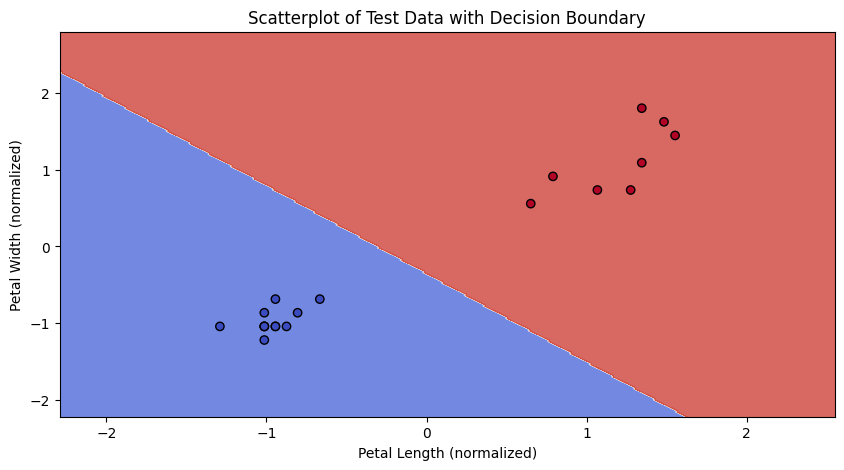

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

# Train the LinearSVC model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot decision boundary on train data
plt.figure(figsize=(10, 5))
plot_decision_boundary(svm_model, X_train, y_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Petal Length (normalized)')
plt.ylabel('Petal Width (normalized)')
plt.title('Decision Boundary on Train Data')
plt.show()

# Plot scatterplot of test data with decision boundary
plt.figure(figsize=(10, 5))
plot_decision_boundary(svm_model, X_test, y_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Petal Length (normalized)')
plt.ylabel('Petal Width (normalized)')
plt.title('Scatterplot of Test Data with Decision Boundary')
plt.show()
